In [56]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, neighbors
from sklearn import tree, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [57]:
df_x = pd.read_csv('X_test.csv')
df_x.to_csv('X_test2.csv', index=True)

In [58]:
df_x = pd.read_csv('X_test2.csv')
df_x

,Unnamed: 0,Unnamed: 0.1,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,0,5106,0.173350,-0.607615,0.590885,0.663942,0.139158,-0.849645,-0.404252,-0.795952,...,-0.803993,0.104394,0.765119,-0.483889,0.388023,0.785104,-0.785554,-0.323895,0.847337,0.140305
1,1,2186,-0.479588,0.895718,-0.523031,-0.296371,0.097879,-0.013481,-0.416397,0.609136,...,0.375101,-0.371153,0.647866,0.458931,-0.521940,-0.928131,-0.924706,0.070631,0.862527,-0.537368
2,2,2589,-0.800532,-0.437812,-0.496730,-0.256678,-1.020800,0.846487,-0.974885,0.354095,...,0.502527,-0.565729,0.956627,-0.293537,0.172772,0.100918,0.803029,-0.210745,0.005809,0.210292
3,3,831,-0.688224,-0.921477,-0.295846,0.528838,0.825233,-0.263329,0.928552,-0.056571,...,-0.438599,-0.359743,-0.615223,-0.163736,0.785550,0.654530,0.450711,0.412335,0.695042,-0.692877
4,4,1421,-0.511049,-0.904988,-0.703157,-0.447858,-0.848783,0.407271,-0.101442,0.424013,...,0.436642,-0.453836,0.149770,0.035325,-0.930484,0.315483,0.641020,-0.639525,0.346457,-0.262189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1535,1942,0.197876,0.406403,0.072314,0.427011,0.238483,0.183695,0.003023,0.882238,...,-0.590239,0.930607,-0.939131,-0.118392,-0.370935,0.777344,0.367024,0.053751,-0.790276,0.659637
1536,1536,174,0.585421,-0.302359,0.083684,0.805858,-0.882222,0.843096,0.353580,-0.421559,...,0.531972,-0.183601,0.229466,0.182376,0.135117,0.480452,-0.940992,0.679087,-0.030589,0.095061
1537,1537,3434,-0.729072,-0.503969,0.038989,0.187473,-0.193113,0.312209,0.316294,0.849387,...,0.611347,0.535599,-0.287716,-0.561834,0.923380,0.976872,0.424460,-0.651315,-0.981638,-0.402029
1538,1538,4269,-0.726073,0.384278,-0.244556,-0.117035,0.262787,-0.557806,-0.364375,0.156360,...,-0.141408,0.899218,-0.674740,0.537195,0.451128,-0.038145,-0.049590,0.002863,-0.518154,-0.830440


In [59]:
df_y = pd.read_csv('y_pred.csv')
df_y

,Unnamed: 0,0
0,0,1
1,1,0
2,2,1
3,3,1
4,4,0
...,...,...
1535,1535,0
1536,1536,0
1537,1537,1
1538,1538,1


In [60]:
pred = df_x.merge(df_y, on='Unnamed: 0')
pred

,Unnamed: 0,Unnamed: 0.1,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y,0
0,0,5106,0.173350,-0.607615,0.590885,0.663942,0.139158,-0.849645,-0.404252,-0.795952,...,0.104394,0.765119,-0.483889,0.388023,0.785104,-0.785554,-0.323895,0.847337,0.140305,1
1,1,2186,-0.479588,0.895718,-0.523031,-0.296371,0.097879,-0.013481,-0.416397,0.609136,...,-0.371153,0.647866,0.458931,-0.521940,-0.928131,-0.924706,0.070631,0.862527,-0.537368,0
2,2,2589,-0.800532,-0.437812,-0.496730,-0.256678,-1.020800,0.846487,-0.974885,0.354095,...,-0.565729,0.956627,-0.293537,0.172772,0.100918,0.803029,-0.210745,0.005809,0.210292,1
3,3,831,-0.688224,-0.921477,-0.295846,0.528838,0.825233,-0.263329,0.928552,-0.056571,...,-0.359743,-0.615223,-0.163736,0.785550,0.654530,0.450711,0.412335,0.695042,-0.692877,1
4,4,1421,-0.511049,-0.904988,-0.703157,-0.447858,-0.848783,0.407271,-0.101442,0.424013,...,-0.453836,0.149770,0.035325,-0.930484,0.315483,0.641020,-0.639525,0.346457,-0.262189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1535,1942,0.197876,0.406403,0.072314,0.427011,0.238483,0.183695,0.003023,0.882238,...,0.930607,-0.939131,-0.118392,-0.370935,0.777344,0.367024,0.053751,-0.790276,0.659637,0
1536,1536,174,0.585421,-0.302359,0.083684,0.805858,-0.882222,0.843096,0.353580,-0.421559,...,-0.183601,0.229466,0.182376,0.135117,0.480452,-0.940992,0.679087,-0.030589,0.095061,0
1537,1537,3434,-0.729072,-0.503969,0.038989,0.187473,-0.193113,0.312209,0.316294,0.849387,...,0.535599,-0.287716,-0.561834,0.923380,0.976872,0.424460,-0.651315,-0.981638,-0.402029,1
1538,1538,4269,-0.726073,0.384278,-0.244556,-0.117035,0.262787,-0.557806,-0.364375,0.156360,...,0.899218,-0.674740,0.537195,0.451128,-0.038145,-0.049590,0.002863,-0.518154,-0.830440,1


In [61]:
pred = pred[['1_x','2_x','1_y','2_y', '0']]
pred

,1_x,2_x,1_y,2_y,0
0,0.173350,-0.607615,-0.150937,-0.169143,1
1,-0.479588,0.895718,0.224456,0.925207,0
2,-0.800532,-0.437812,0.081826,0.310439,1
3,-0.688224,-0.921477,0.920105,-0.780674,1
4,-0.511049,-0.904988,-0.809627,0.033795,0
...,...,...,...,...,...
1535,0.197876,0.406403,0.294593,-0.484862,0
1536,0.585421,-0.302359,-0.772491,-0.672693,0
1537,-0.729072,-0.503969,-0.470965,0.172671,1
1538,-0.726073,0.384278,-0.175943,-0.251190,1


In [62]:
pred_filtered = pred[pred['0'] == 1]
pred_filtered

,1_x,2_x,1_y,2_y,0
0,0.173350,-0.607615,-0.150937,-0.169143,1
2,-0.800532,-0.437812,0.081826,0.310439,1
3,-0.688224,-0.921477,0.920105,-0.780674,1
6,-0.545898,-0.108953,0.463375,-0.251465,1
7,0.711528,-0.512358,-0.552448,-0.407858,1
...,...,...,...,...,...
1522,-0.702162,-0.644228,-0.800532,-0.437812,1
1524,-0.497415,-0.708097,0.623690,-0.190828,1
1533,0.087665,0.251736,-0.242174,-0.082804,1
1537,-0.729072,-0.503969,-0.470965,0.172671,1


In [63]:
embedding_df = pd.read_csv('node2vec.csv')
embedding_df

,Unnamed: 0,uri,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0,http://halal.addi.is.its.ac.id/manufactures/Je...,-0.895698,-0.652424,-0.352661,0.977000,0.158936,0.748668,0.517554,0.480040,...,-0.962404,-0.304005,0.409442,-0.185668,0.873310,-0.663590,0.126802,-0.200655,-0.984155,-0.286988
1,1,http://halal.addi.is.its.ac.id/manufactures/Am...,-0.413752,-0.425428,-0.118045,-0.487334,-0.981375,0.024288,0.156467,0.573134,...,0.044928,-0.060246,-0.716641,0.445243,0.203080,-0.022848,-0.130727,-0.369376,-0.433882,0.433699
2,2,http://halal.addi.is.its.ac.id/manufactures/St...,0.978251,-0.121332,0.924200,0.431506,-0.762944,0.891782,-0.375167,0.448796,...,0.742334,-0.152895,-0.404350,-0.758072,0.574744,0.681240,0.048268,-0.913959,-0.591921,-0.226300
3,3,http://halal.addi.is.its.ac.id/manufactures/Li...,-0.080296,0.476265,-0.516736,0.671542,-0.995670,-0.889545,-0.308378,-0.197450,...,-0.209189,-0.495756,0.512841,0.102529,-0.303258,0.411760,-0.870666,-0.420852,-0.449765,0.380749
4,4,http://halal.addi.is.its.ac.id/manufactures/Yi...,-0.596870,0.193437,0.035567,0.992794,-0.433264,-0.736693,0.580241,-0.682021,...,-0.680717,-0.380390,0.020086,0.603221,-0.175771,0.649488,-0.255825,-0.721383,-0.697301,0.991840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21234,21234,http://halal.addi.is.its.ac.id/manufactures/Pf...,0.223399,-0.565066,0.818777,0.644069,0.507565,-0.288127,0.381643,0.460203,...,-0.298752,0.633185,-0.741751,0.137565,-0.099919,0.117547,0.497558,0.195654,0.273953,-0.933555
21235,21235,http://halal.addi.is.its.ac.id/manufactures/Te...,-0.090774,0.389922,0.539096,0.732077,0.215295,0.640650,-0.196415,0.773062,...,0.914787,-0.101291,-0.085768,0.057964,-0.560293,0.354463,0.616468,-0.286572,-0.221109,-0.947666
21236,21236,http://halal.addi.is.its.ac.id/manufactures/By...,0.984142,0.970452,0.360086,0.820587,0.173289,0.341781,0.078333,-0.235417,...,0.747236,-0.674036,-0.831096,0.810495,0.582437,0.592411,-0.054451,-0.315766,-0.922519,0.012182
21237,21237,http://halal.addi.is.its.ac.id/manufactures/My...,0.805863,-0.648494,0.735636,-0.475341,0.651464,-0.005647,0.834465,0.636916,...,0.019946,-0.735493,0.001565,-0.103676,-0.877711,-0.001631,0.443867,0.948692,-0.448095,0.255828


In [67]:
mix = pred_filtered.merge(embedding_df, left_on='1_x', right_on='1').merge(embedding_df, left_on='1_y', right_on='1')
mix

,1_x,2_x,1_y,2_y,0,Unnamed: 0_x,uri_x,1_x,2_x,3_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,-0.800532,-0.437812,0.081826,0.310439,1,2969,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.800532,-0.437812,-0.496730,...,0.502527,-0.565729,0.956627,-0.293537,0.172772,0.100918,0.803029,-0.210745,0.005809,0.210292
1,-0.159314,0.914085,0.081826,0.310439,1,5067,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.159314,0.914085,-0.718593,...,0.502527,-0.565729,0.956627,-0.293537,0.172772,0.100918,0.803029,-0.210745,0.005809,0.210292
2,-0.413014,-0.294657,0.081826,0.310439,1,4214,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.413014,-0.294657,0.153581,...,0.502527,-0.565729,0.956627,-0.293537,0.172772,0.100918,0.803029,-0.210745,0.005809,0.210292
3,-0.800532,-0.437812,-0.616811,-0.520762,1,2969,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.800532,-0.437812,-0.496730,...,-0.823342,0.158204,0.967185,0.650535,0.420241,0.779644,-0.296553,0.400660,0.475886,0.060660
4,-0.800532,-0.437812,-0.702162,-0.644228,1,2969,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.800532,-0.437812,-0.496730,...,-0.118412,-0.053654,-0.230298,0.400629,-0.034700,0.989183,-0.175710,0.810372,0.751791,0.270028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.889860,0.552808,0.433910,0.157288,1,4170,http://halal.addi.is.its.ac.id/foodproducts/Nu...,0.889860,0.552808,-0.186388,...,0.794986,0.737540,0.484876,-0.386998,-0.310399,0.925205,0.512617,0.315060,0.407618,-0.671302
318,-0.599967,0.949366,-0.523951,-0.598450,1,6197,http://halal.addi.is.its.ac.id/foodproducts/Ku...,-0.599967,0.949366,0.162818,...,0.600566,-0.913623,0.968724,0.525734,0.804183,0.193664,-0.499304,-0.469340,-0.672684,-0.337444
319,0.274950,0.483662,0.713457,-0.094504,1,4528,http://halal.addi.is.its.ac.id/foodproducts/Ta...,0.274950,0.483662,0.873215,...,0.323702,-0.085143,0.705012,-0.533331,0.794265,0.066193,0.341792,0.003833,-0.309150,-0.653312
320,-0.268609,-0.706628,-0.806220,-0.016140,1,3784,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.268609,-0.706628,-0.866171,...,0.758822,0.504531,-0.798031,0.699248,-0.768904,-0.106855,0.078304,0.564953,-0.088980,0.860178


In [68]:
df = mix[['uri_x', 'uri_y']]
df
#df.to_csv('node2vecvisualisasi.csv')

,uri_x,uri_y
0,http://halal.addi.is.its.ac.id/foodproducts/In...,http://halal.addi.is.its.ac.id/foodproducts/In...
1,http://halal.addi.is.its.ac.id/foodproducts/In...,http://halal.addi.is.its.ac.id/foodproducts/In...
2,http://halal.addi.is.its.ac.id/foodproducts/In...,http://halal.addi.is.its.ac.id/foodproducts/In...
3,http://halal.addi.is.its.ac.id/foodproducts/In...,http://halal.addi.is.its.ac.id/foodproducts/Kr...
4,http://halal.addi.is.its.ac.id/foodproducts/In...,http://halal.addi.is.its.ac.id/foodproducts/Du...
...,...,...
317,http://halal.addi.is.its.ac.id/foodproducts/Nu...,http://halal.addi.is.its.ac.id/foodproducts/No...
318,http://halal.addi.is.its.ac.id/foodproducts/Ku...,http://halal.addi.is.its.ac.id/foodproducts/In...
319,http://halal.addi.is.its.ac.id/foodproducts/Ta...,http://halal.addi.is.its.ac.id/foodproducts/Kh...
320,http://halal.addi.is.its.ac.id/foodproducts/In...,http://halal.addi.is.its.ac.id/foodproducts/Gl...


In [69]:
df = pd.read_csv('node2vecvisualisasi.csv')

In [70]:
import networkx as nx
g = nx.from_pandas_edgelist(df, source='uri x',target='uri y')

In [71]:
mylist = df.values.tolist()
mylist

[[0, 'Indomaret Kacang Kriuk', 'Indomaret Snack Kacang Atom Shanghai'],
 [1, 'Indofood Syrup Freiss Orange', 'Indomaret Snack Kacang Atom Shanghai'],
 [2, 'Indomaret Kacang Bumbu', 'Indomaret Snack Kacang Atom Shanghai'],
 [3, 'Indomaret Kacang Kriuk', 'Kraft Cheese Quick Melt'],
 [4, 'Indomaret Kacang Kriuk', 'Dua Kelinci Kacang Sangrai'],
 [5, 'Wafer Selamat Chocolate', 'Dua Kelinci Kacang Sangrai'],
 [6, 'Indomaret Kacang Bali', 'Dua Kelinci Kacang Sangrai'],
 [7, 'Indomaret Kacang Kriuk', 'Kacang Telor'],
 [8, 'Garuda Kacang Atom Apc Pedas', 'Kacang Telor'],
 [9, 'Indomaret Kacang Kriuk', 'Indomaret Beras Merah'],
 [10, 'Indomaret Air Oksi', 'Roma Biscuit Festive Treats'],
 [11, 'Nata De Coco', 'Roma Biscuit Festive Treats'],
 [12, 'Indomaret Air Oksi', 'Indomaret Garam'],
 [13, 'Indomaret Air Oksi', 'Indomaret Air Mineral'],
 [14, 'Eternalplus Mineral Water', 'Indomaret Air Mineral'],
 [15, 'Club Air Mineral', 'Indomaret Air Mineral'],
 [16, 'Selamat Wafer Chocolate Cream', 'Indom

In [72]:
g.add_edges_from(mylist,weight=1,label="linkedTo")
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

ValueError: dictionary update sequence element #0 has length 1; 2 is required

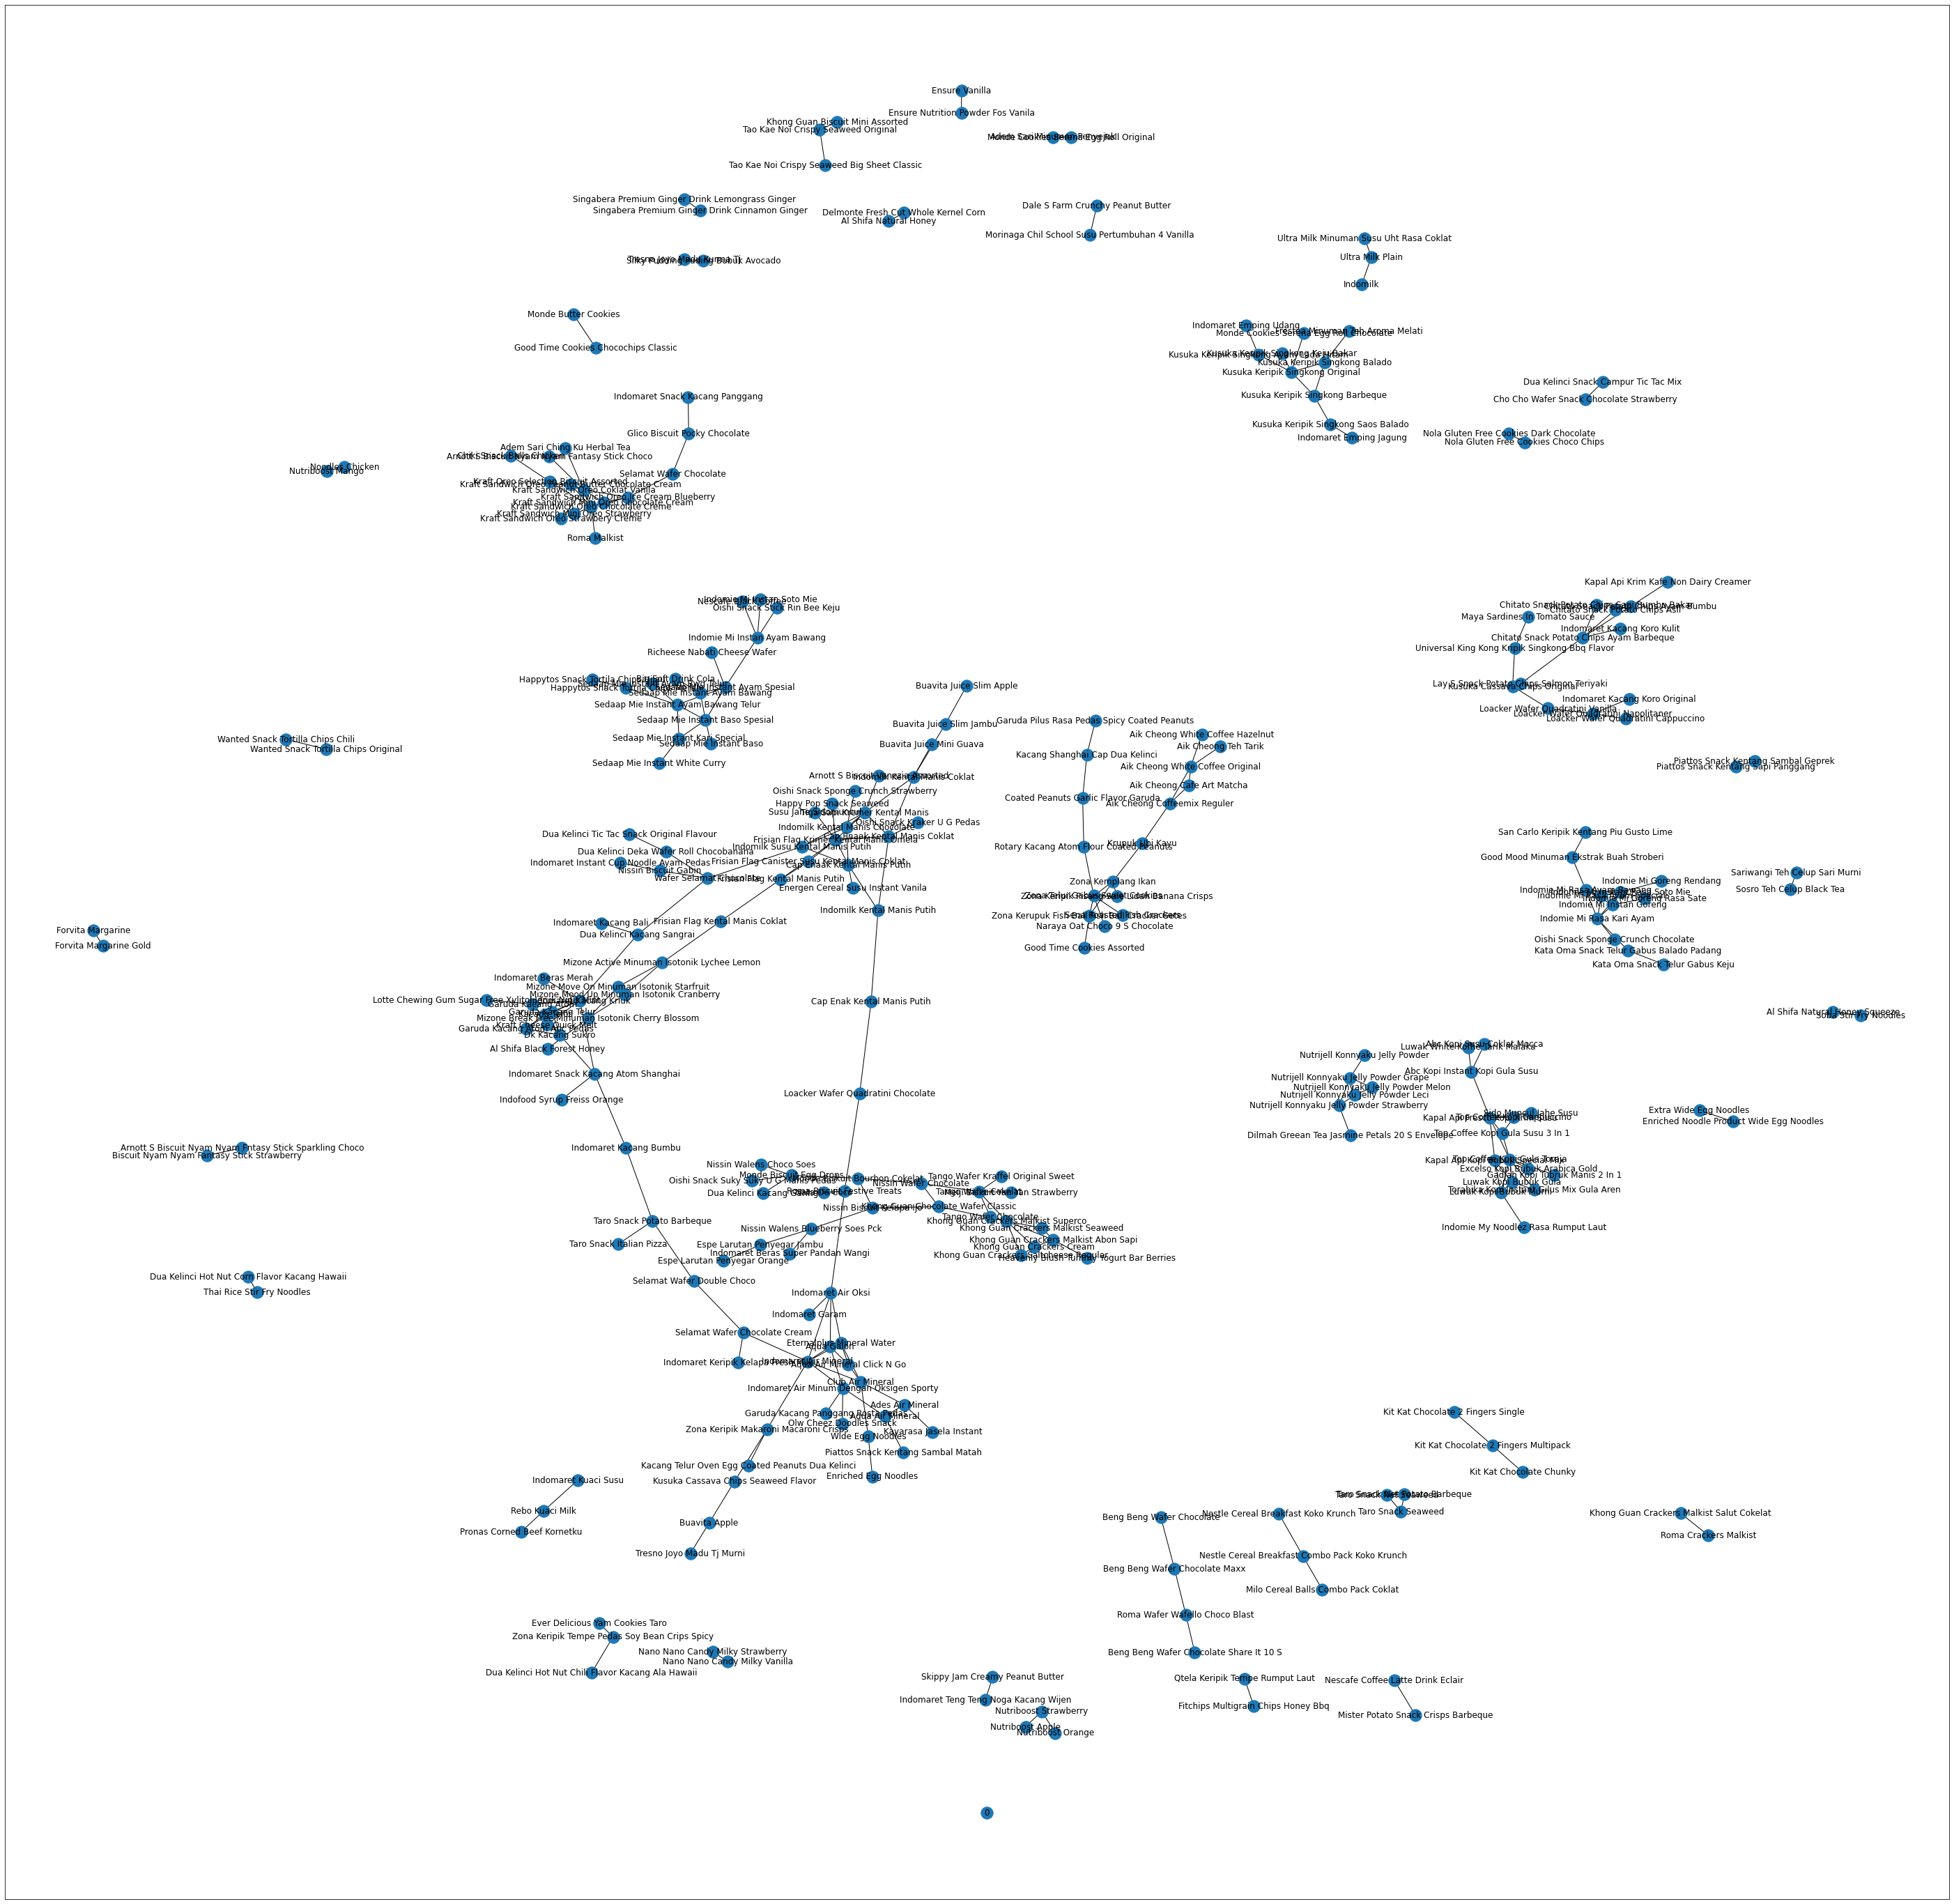

In [73]:
fig, ax = plt.subplots(figsize=(50,50))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax)
nx.draw_networkx_edges(g, layout,  ax=ax)
_ = nx.draw_networkx_labels(g, layout, ax=ax)

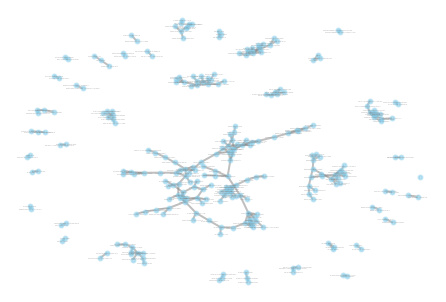

In [74]:
nx.draw(g, with_labels=True, node_size=15, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=1, 
        font_color="grey", font_weight="bold", width=2, edge_color="grey")

In [75]:
import pyvis
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(g)
net.show('example.html')